## Aprendizaje No Supervisado 

## Importación de Librerías

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
pd.set_option('display.max_columns',100)
import io

## Lectura del dataset

In [87]:
df=pd.read_csv("data.csv")
df.head(4)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M


In [88]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [89]:
df.shape

(18207, 89)

In [90]:
df.isna().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

## Primera selección de variables de interés

In [91]:
n=10000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['Overall']>70)]

skills_ratings = ['Position','Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
                  'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                  'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                  'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                  'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                  'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

35 variables numéricas de desempeño según habilidad


In [92]:
df_n = df_n[skills_ratings]

In [93]:
df_n.isna().sum()

Position           0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

## Unificación de la variable Position

In [94]:
df_n.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [95]:
df_n = df_n.assign(short_position = df_n.Position.replace({
'GK':'goalkeeper',
'LF':'front',
'ST':'front',
'CF':'front',
'RF':'front',
'LS':'front',
'RS':'front',
'LW':'midfield',
'RW':'midfield',
'RM':'midfield',
'LM':'midfield',
'CAM':'midfield',
'CM':'midfield',
'CDM':'midfield',
'RCM':'midfield',
'LAM':'midfield', 
'RDM':'midfield',
'RAM':'midfield',
'LCM':'midfield',
'LDM':'midfield', 
'RB':'back',
'LB':'back',
'RWB':'back',
'LWB':'back',
'CB':'back',
'RCB':'back', 
'LCB':'back'}))

In [96]:
df_n.short_position.unique()

array(['front', 'midfield', 'goalkeeper', 'back'], dtype=object)

- LongPassing: habilidad de dar pases largos MEDIOCAMPO
- ShortPassing: habilidad de dar pases cortos MEDIOCAMPO
- Finishing: habilidad de marcar un gol estando cara a cara con el arquero DELANTERO
- Crossing: habilidad para realizar un cambio de frente DEFENSOR-MEDIOCAMPO
- HeadingAccuracy: habilidad en el cabeceo CUALQUIERA 
- Dribbling: habilidad de gambeteo MEDIOCAMPO-DELANTERO
- BallControl: habilidad para mantener el control de la pelota CUALQUIERA
- Curve: habilidad de patear con comba DELANTERO
- Acceleration: habilidad de correr rápido CUALQUIERA
- SprintSpeed: habilidad de correr a gran velocidad en cortas distancias CUALQUIERA
- Agility: habilidad de moverse agilmente MEDIOCAMPO-DELANTERO 
- Reactions: habilidad de reaccion rapido ARQUERO- DEFENSOR
- Penalties: habilidad para patear penales MEDIOCAMPO-DELANTERO
- Composure: habilidad para mantenerse equilbrado durante situaciones de alta presión CUALQUIERA
- LongShots: habilidad para pegarle a la pelota a larga distancia ARQUERO-DEFENSOR
- ShotPower: fuerza en el pegue a la pelota CUALQUIERA
- Jumping: habilidad para saltar CUALQUIERA
- Stamina: resistencia del jugador CUALQUIERA
- Strength: fuerza del jugador CUALQUIERA
- Aggression: enojo CUALQUIERA
- Interceptions: habilidad para interceptar pases DEFENSA
- Marking: habilidad para marcar a algun jugador DEFENSA
- StandingTackle: habilidad para sacarle la pelota al jugador contrario, sin tirarse al piso DEFENSA
- SlidingTackle: habilidad para sacarle la pelota al jugador contrario, tirandose al piso DEFENSA
- GKDiving: habilidad para desplazarse en el aire en busca de la pelota ARQUERO
- GKHandling: habilidad para agarrar la pelota en el aire ARQUERO
- GKKicking: habilidad del arquero para patear la pelota ARQUERO
- GKPositioning: habilidad para aprovechar el espacio en el área chica ARQUERO
- GKReflexes: reflejos del arquero ARQUEROC

## Correlación entre variables

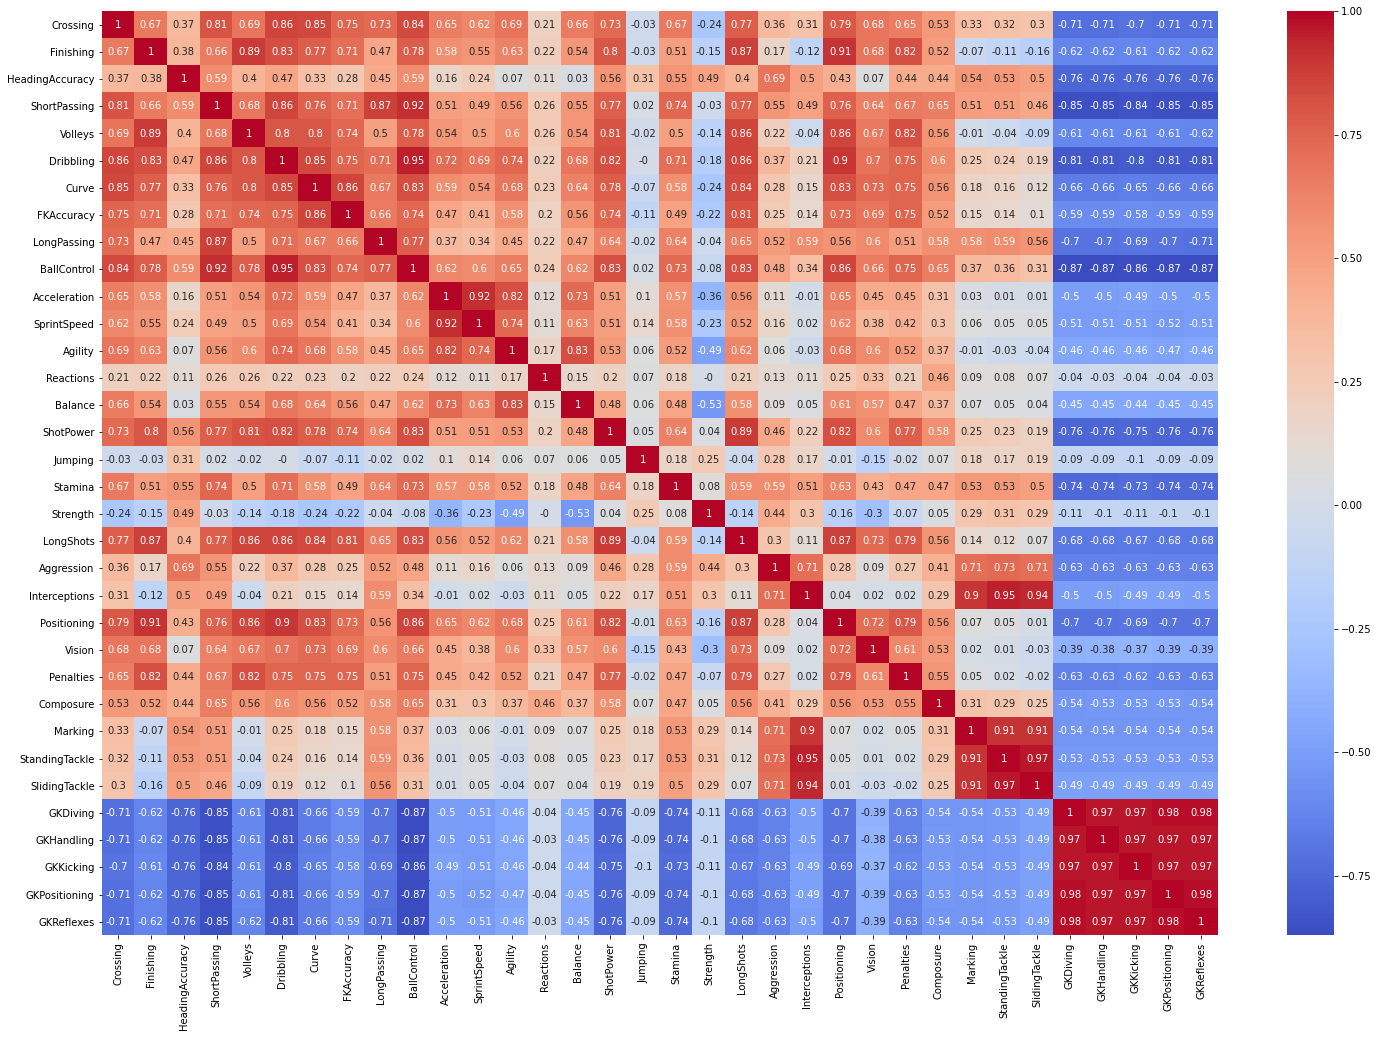

In [97]:
plt.figure(figsize=(25,17))
corr = df_n.corr().round(2)
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot=True, cmap= 'coolwarm')
plt.show()

## Selección de variables en base a correlación

- GKDiving: +
- GKHandling: -
- GKKicking: -
- GKPositioning: -
- SlidingTackle: -
- StandingTackle: -
- Marking: -
- Composure: +
- Penalties: -
- Finishing: +
- Vision: +
- Positioning: -
- Interceptions: -
- Aggression: -
- LongShots: -
- Strength: +
- Stamina: +
- Jumping: +
- ShotPower: +
- Balance: -
- Reactions: +
- Agility: +
- SprintSpeed: -
- Acceleration: -
- BallControl: -
- LongPassing: -
- Dribling: +
- FKAccuracy: -
- Curve: -
- Volleys: -
- HeadingAccuracy: +
- Crossing: -
- ShortPassing: -

In [99]:
df_rv = df_n[["short_position",
              "GKDiving",
              "Composure",
              "Finishing",
              "Vision",
              "Strength",
              "Stamina", 
              "Jumping",
              "ShotPower",
              "Reactions",
              "Agility",
              "Dribbling",
              "HeadingAccuracy"]]

In [100]:
df_rv

,short_position,GKDiving,Composure,Finishing,Vision,Strength,Stamina,Jumping,ShotPower,Reactions,Agility,Dribbling,HeadingAccuracy
0,front,6.0,96.0,95.0,94.0,59.0,72.0,68.0,85.0,95.0,91.0,97.0,70.0
1,front,7.0,95.0,94.0,82.0,79.0,88.0,95.0,95.0,96.0,87.0,88.0,89.0
2,midfield,9.0,94.0,87.0,87.0,49.0,81.0,61.0,80.0,94.0,96.0,96.0,62.0
3,goalkeeper,90.0,68.0,13.0,68.0,64.0,43.0,67.0,31.0,90.0,60.0,18.0,21.0
4,midfield,15.0,88.0,82.0,94.0,75.0,90.0,63.0,91.0,91.0,79.0,86.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,midfield,4.0,62.0,62.0,72.0,73.0,67.0,31.0,66.0,71.0,68.0,72.0,54.0
4745,midfield,9.0,69.0,57.0,69.0,76.0,84.0,78.0,63.0,69.0,74.0,71.0,59.0
4746,front,15.0,67.0,73.0,62.0,65.0,76.0,70.0,63.0,64.0,88.0,73.0,67.0
4747,midfield,11.0,64.0,57.0,58.0,83.0,87.0,61.0,84.0,66.0,58.0,70.0,71.0


In [101]:
df_rv.groupby("short_position").agg(("mean", "std"))

GKDiving            Composure             Finishing  \
                     mean       std       mean        std       mean   
short_position                                                         
back            10.715152  3.114234  68.521886   6.309330  41.023569   
front           10.480282  3.196265  71.630986   6.933832  75.605634   
goalkeeper      75.673563  4.570907  54.289655  11.053859  13.213793   
midfield        10.608306  3.205644  71.645116   6.475899  63.276546   

                              Vision              Strength             \
                      std       mean        std       mean        std   
short_position                                                          
back            12.815353  53.422222  12.724646  75.200673   9.107630   
front            4.989068  64.833803   8.930099  74.349296  10.343151   
goalkeeper       3.193137  45.521839  12.745157  65.800000   9.620638   
midfield        10.229379  71.783860   6.605682  65.245399  11.654257   

                  Stamina               Jumping             ShotPower  \
                     mean        std       mean        std       mean   
short_position                                                          
back            72.164983  10.364794  72.387205  10.522225  61.363636   
front           69.866197   8.944610  71.945070  10.592121  75.785915   
goalkeeper      33.650575   7.113447  64.786207  10.242578  23.868966   
midfield        74.337423   9.659005  65.414346  12.246412  72.070788   

                           Reactions              Agility             \
                      std       mean       std       mean        std   
short_position                                                         
back            12.808396  70.942088  5.374331  62.492929  13.147032   
front            5.469167  72.607042  5.974483  70.764789  10.903586   
goalkeeper       8.361301  70.822989  5.611741  46.577011  12.082299   
midfield         7.693963  71.933931  5.583631  74.712128   9.961598   

                Dribbling            HeadingAccuracy             
                     mean        std            mean        std  
short_position                                                   
back            59.824242  12.727052       69.559596   8.644443  
front           72.312676   6.316141       71.208451   9.240186  
goalkeeper      15.216092   4.118545       14.947126   4.348257  
midfield        74.022180   6.837931       57.051911  11.348424

## Columnas más diferenciables

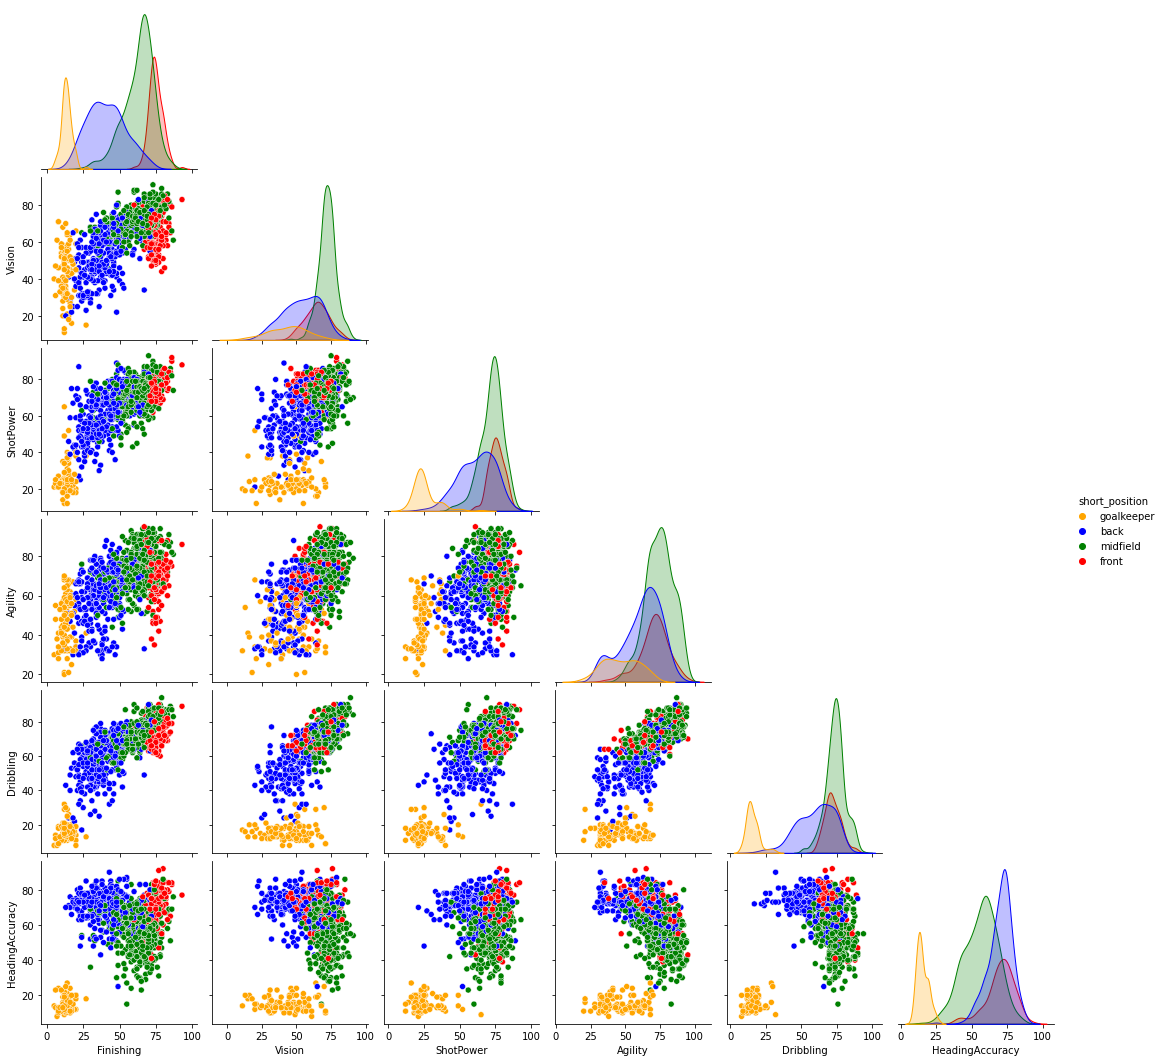

In [102]:
sns.pairplot(data=df_n[[
                 "short_position",
                 "Finishing",
                 "Vision",
                 "ShotPower",
                 "Agility",
                 "Dribbling",
                 "HeadingAccuracy"]].sample(1000),
             hue='short_position',
             corner= True,
             palette= {'front': 'red',
                       'midfield': 'green',
                       'goalkeeper': 'orange',
                       'back': 'blue'})

## Clustering

In [103]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

### TSNE

In [112]:
scaler = StandardScaler()
seed = 0

X = df_rv.drop(columns="short_position")
X_sc = scaler.fit_transform(X)
X_TSNE = TSNE(n_components=2,
              verbose=1,
              perplexity=30,
              n_iter=1000,
              init='random',
              random_state=seed).fit_transform(X)
short_positions = df_rv.short_position

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4749 samples in 0.013s...
[t-SNE] Computed neighbors for 4749 samples in 0.627s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4749
[t-SNE] Computed conditional probabilities for sample 2000 / 4749
[t-SNE] Computed conditional probabilities for sample 3000 / 4749
[t-SNE] Computed conditional probabilities for sample 4000 / 4749
[t-SNE] Computed conditional probabilities for sample 4749 / 4749
[t-SNE] Mean sigma: 6.268617
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.662582
[t-SNE] KL divergence after 1000 iterations: 1.861446


In [113]:
df_TSNE = pd.DataFrame(X_TSNE).assign(position=short_positions)

<AxesSubplot:title={'center':'TSNE with position'}, xlabel='TSNE 2', ylabel='TSNE 1'>

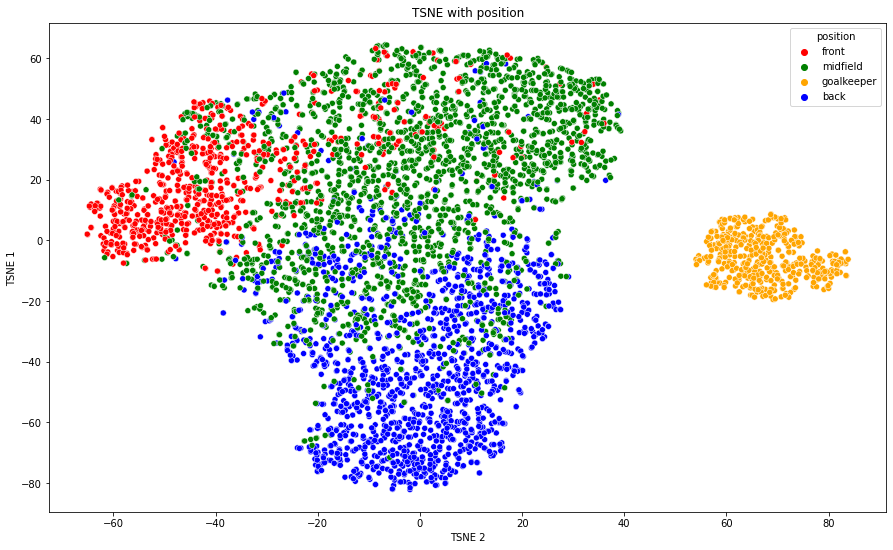

In [114]:
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE with position')
sns.scatterplot(data=df_TSNE,
                x=0,
                y=1,
                palette={'front': 'red',
                         'midfield': 'green',
                         'goalkeeper': 'orange',
                         'back': 'blue'},
                hue='position')

### KMeans

Para n_clusters = 3 El silhouette_score promedio es : 0.3574936641330956
Para n_clusters = 4 El silhouette_score promedio es : 0.24368917436098803
Para n_clusters = 5 El silhouette_score promedio es : 0.23091064671960296
Para n_clusters = 6 El silhouette_score promedio es : 0.1998473762512694


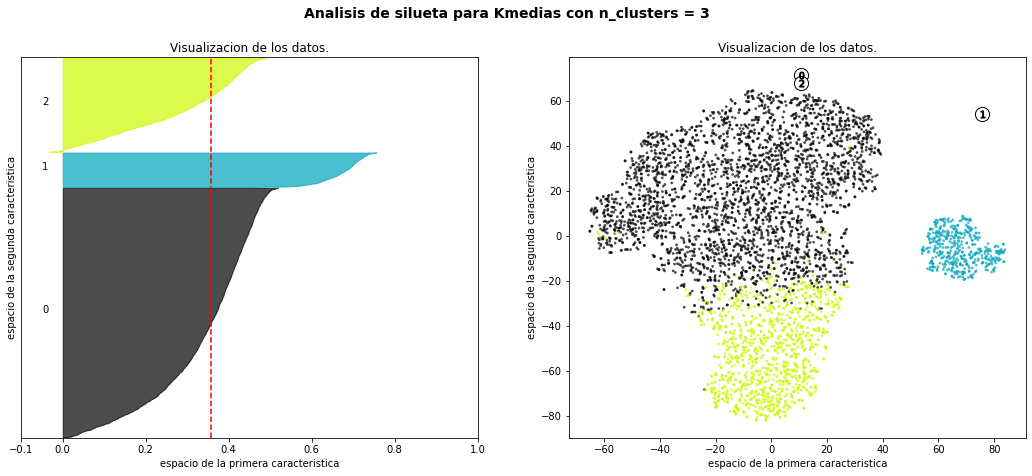

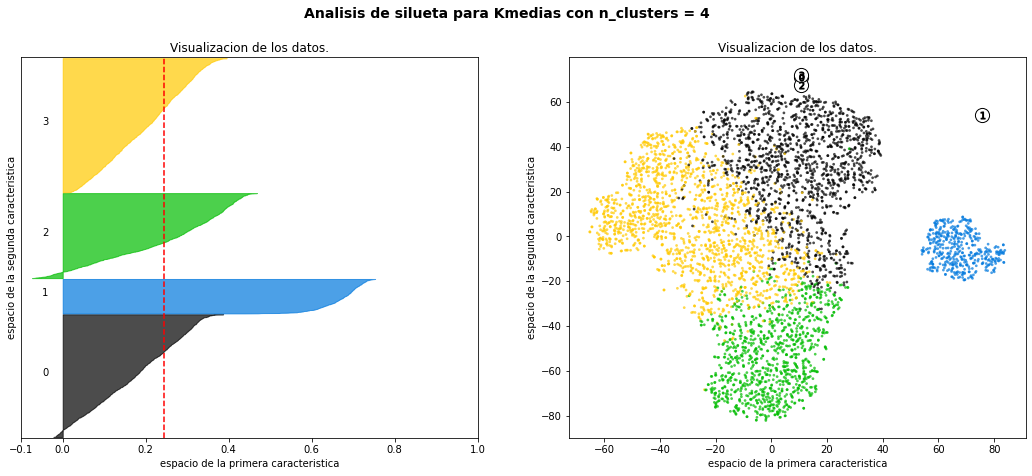

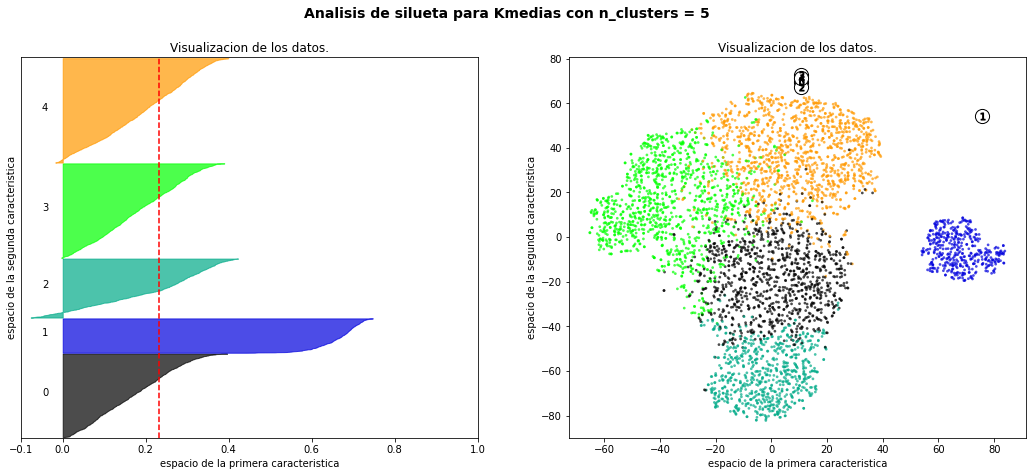

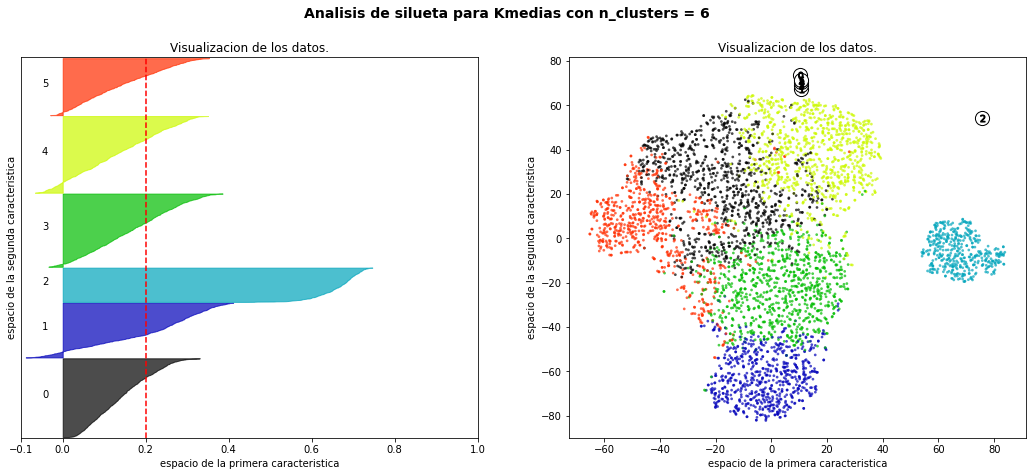

In [115]:
range_n_clusters = [3, 4, 5, 6]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=seed, n_init = 100 )
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_TSNE[:, 0], X_TSNE[:, 1]
                , marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

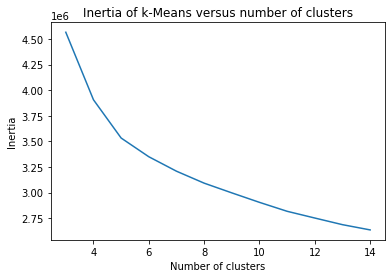

In [116]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i, random_state = 28).fit(X).inertia_ for i in range(3,15)]

plt.plot(np.arange(3, 15), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [ ]:
### Número de clusters seleccionado

In [119]:
n_clust = 4

km = KMeans(n_clusters=n_clust, random_state=seed)
km.fit(X)

df_rv = df_rv.assign(kmeans_cluster=km.labels_)

In [123]:
df_rv

,short_position,GKDiving,Composure,Finishing,Vision,Strength,Stamina,Jumping,ShotPower,Reactions,Agility,Dribbling,HeadingAccuracy,kmeans_cluster
0,front,6.0,96.0,95.0,94.0,59.0,72.0,68.0,85.0,95.0,91.0,97.0,70.0,3
1,front,7.0,95.0,94.0,82.0,79.0,88.0,95.0,95.0,96.0,87.0,88.0,89.0,1
2,midfield,9.0,94.0,87.0,87.0,49.0,81.0,61.0,80.0,94.0,96.0,96.0,62.0,3
3,goalkeeper,90.0,68.0,13.0,68.0,64.0,43.0,67.0,31.0,90.0,60.0,18.0,21.0,0
4,midfield,15.0,88.0,82.0,94.0,75.0,90.0,63.0,91.0,91.0,79.0,86.0,55.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,midfield,4.0,62.0,62.0,72.0,73.0,67.0,31.0,66.0,71.0,68.0,72.0,54.0,3
4745,midfield,9.0,69.0,57.0,69.0,76.0,84.0,78.0,63.0,69.0,74.0,71.0,59.0,1
4746,front,15.0,67.0,73.0,62.0,65.0,76.0,70.0,63.0,64.0,88.0,73.0,67.0,3
4747,midfield,11.0,64.0,57.0,58.0,83.0,87.0,61.0,84.0,66.0,58.0,70.0,71.0,1


In [129]:
df_rv[["kmeans_cluster", "short_position"]].groupby("kmeans_cluster").count()

,short_position
kmeans_cluster,
0,435
1,1684
2,1087
3,1543


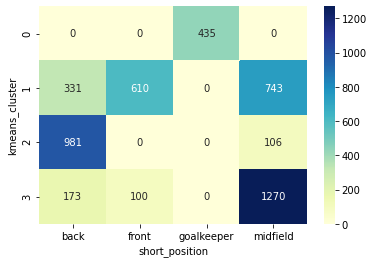

In [137]:
exp = pd.crosstab(
    df_rv.kmeans_cluster,
    df_rv.short_position)
sns.heatmap(exp, annot=True, fmt='g', cmap="YlGnBu")
plt.show()

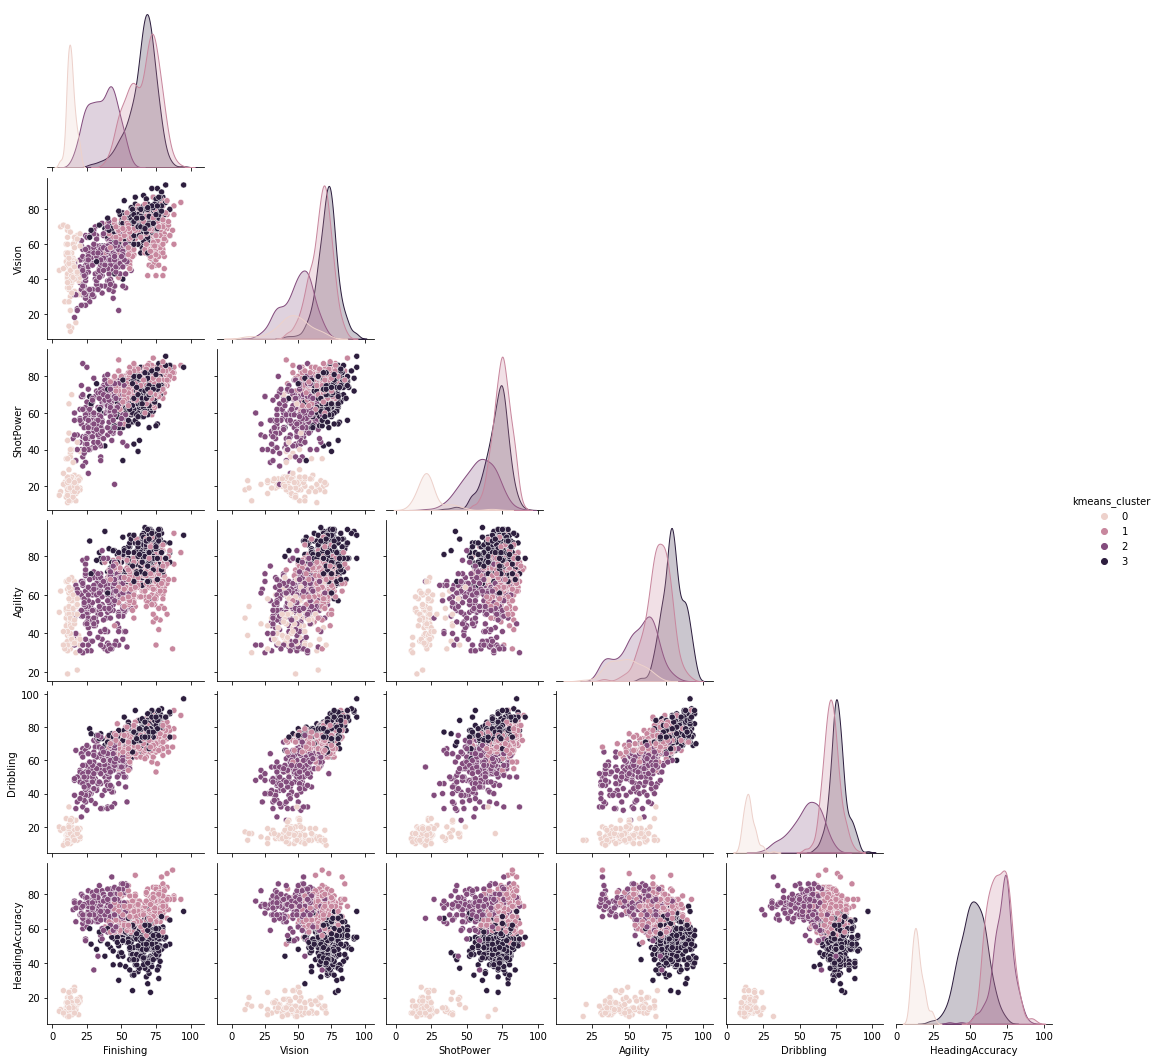

In [127]:
sns.pairplot(data=df_rv[[
                 "kmeans_cluster",
                 "Finishing",
                 "Vision",
                 "ShotPower",
                 "Agility",
                 "Dribbling",
                 "HeadingAccuracy"]].sample(1000),
             hue='kmeans_cluster',
             corner= True)

In [139]:
from sklearn.metrics import homogeneity_completeness_v_measure, silhouette_score

labels_pred = df_rv.kmeans_cluster
labels_true = df_rv.short_position

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X, labels))

Silhouette Coefficient: 0.244


In [142]:
h, c, v = homogeneity_completeness_v_measure(labels_true, labels_pred)

In [143]:
print("Homogeneity: %0.3f" % h)
print("Completeness: %0.3f" % c)
print("V-measure: %0.3f" % v)

Homogeneity: 0.483
Completeness: 0.459
V-measure: 0.471
